In [7]:
!pip install yaml

ERROR: Could not find a version that satisfies the requirement yaml (from versions: none)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for yaml


In [1]:
from collections import defaultdict
from datetime import datetime
import pandas as pd
import numpy as np
from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator
from rdkit import Chem
from rdkit.Chem import AllChem
import sys
from rdkit.Chem import Draw

In [2]:
df = pd.read_csv("./ring_data3_calculated.csv", encoding="utf-8")
df.dropna(axis=0, inplace=True)

mol_dict = defaultdict(list)
for smile in df["SMILES"].values:
    if smile == "nan":
        continue2
    bi = {}
    fpgen = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, bitInfo=bi)
    # bi.update({37: ((0, 0),)})
    # lst.append(Draw.DrawMorganBit(mol, 37, bi, useSVG=True))
    # 753 715 1195 838 1457 1476 888 694 650 455 780 1448/ 790 1457 1384 838 753 1171 358 650 1073 1963 1 1602 1933 935 
    for n in [753, 715, 1195, 838, 1457, 1476, 888, 694, 650, 455, 780, 1448, 790, 1384]:
        if n in list(fpgen.GetOnBits()):
            mol_dict[n].append(Draw.DrawMorganBit(mol, n, bi, useSVG=True))

NameError: name 'mol' is not defined

In [2]:
df_product = pd.read_csv("./Reduction potential - product_only.csv", encoding="utf-8")
df_radical = pd.read_csv("./Reduction potential - radical.csv", encoding="utf-8")
df_reaction = pd.read_csv("./Reduction potential - reaction.csv", encoding="utf-8")

In [3]:
columns = df_product.iloc[0]
df_product = df_product[1:].reset_index(drop=True)
df_product.columns = columns

df_product

,count,Group1,Group2,number,IUPAC Name,SMILE,SRP (mV),SRP (V),neutral
0,1,1.quinone,1. Benzoqulnone,1,"cyclohexa-2,5-diene-1,4-dione",C1=CC(=O)C=CC1=O,78,0.078,NaN
1,2,NaN,NaN,2,"2-methylcyclohexa-2,5-diene-1,4-dione",CC1=CC(=O)C=CC1=O,23,0.023,NaN
2,3,NaN,NaN,3,"2,3-dimethylcyclohexa-2,5-diene-1,4-dione",CC1=C(C(=O)C=CC1=O)C,-74,-0.074,NaN
3,4,NaN,NaN,4,"2,5-dimethylcyclohexa-2,5-diene-1,4-dione",CC1=CC(=O)C(=CC1=O)C,-67,-0.067,NaN
4,5,NaN,NaN,5,"2,6-dimethylcyclohexa-2,5-diene-1,4-dione",CC1=CC(=O)C=C(C1=O)C,-80,-0.08,NaN
...,...,...,...,...,...,...,...,...,...
607,608,NaN,NaN,2,"4-methyl-1,4-dihydropyrazol-5-one",CC1C=NNC1=O,320,0.32,NaN
608,609,NaN,NaN,3,"3,4-dimethyl-1,4-dihydropyrazol-5-one",CC1C(=NNC1=O)C,330,0.33,NaN
609,610,NaN,NaN,4,"1,5-dimethyl-2-phenylpyrazol-3-one",CC1=CC(=O)N(N1C)C2=CC=CC=C2,1200-1500,1.200-1.500,NaN
610,611,NaN,5. peroxy radical,1,NaN,CO[O],600-700,0.600-0.700,NaN


In [4]:
df_product = df_product[df_product['number'] != 38]
# 'column1' 컬럼을 삭제하려면
df_product = df_product.drop(columns=['count', 'Group1', 'Group2', 'number', 'SRP (mV)', 'neutral'])
df_product['solvent'] = 'water'

In [5]:
df_product = df_product.dropna(subset=['SMILE'])
df_product['type'] = 'neutral'
df_product

,IUPAC Name,SMILE,SRP (V),solvent,type
0,"cyclohexa-2,5-diene-1,4-dione",C1=CC(=O)C=CC1=O,0.078,water,neutral
1,"2-methylcyclohexa-2,5-diene-1,4-dione",CC1=CC(=O)C=CC1=O,0.023,water,neutral
2,"2,3-dimethylcyclohexa-2,5-diene-1,4-dione",CC1=C(C(=O)C=CC1=O)C,-0.074,water,neutral
3,"2,5-dimethylcyclohexa-2,5-diene-1,4-dione",CC1=CC(=O)C(=CC1=O)C,-0.067,water,neutral
4,"2,6-dimethylcyclohexa-2,5-diene-1,4-dione",CC1=CC(=O)C=C(C1=O)C,-0.08,water,neutral
...,...,...,...,...,...
607,"4-methyl-1,4-dihydropyrazol-5-one",CC1C=NNC1=O,0.32,water,neutral
608,"3,4-dimethyl-1,4-dihydropyrazol-5-one",CC1C(=NNC1=O)C,0.33,water,neutral
609,"1,5-dimethyl-2-phenylpyrazol-3-one",CC1=CC(=O)N(N1C)C2=CC=CC=C2,1.200-1.500,water,neutral
610,NaN,CO[O],0.600-0.700,water,neutral


In [6]:
duplicate_rows = df_product[df_product.duplicated(subset=['SMILE'], keep=False)].sort_values(by=['SMILE'])
duplicate_rows
duplicate_rows.to_csv("duplicate_rows_product.csv", index=False)

# 부등호 없애기 - 안겹쳐도 지우기
# 겹치는 값은 - 비슷한 것들은 아무거나, 차이나는 것들은 제외하고 마킹해서 드리기

In [7]:
duplicate_rows

,IUPAC Name,SMILE,SRP (V),solvent,type
600,2-sulfanylethanol,C(CS)O,1.726,water,neutral
594,2-sulfanylethanol,C(CS)O,0.75,water,neutral
439,"1,10-phenanthroline",C1=CC2=C(C3=C(C=CC=N3)C=C2)N=C1,-0.85,water,neutral
409,"1,10-phenanthroline",C1=CC2=C(C3=C(C=CC=N3)C=C2)N=C1,-0.47,water,neutral
554,NaN,C1=CC3=C(C=C1)N(C2=C(C=CC=C2)S3)CCC[S]([O-])(=...,0.834,water,neutral
549,NaN,C1=CC3=C(C=C1)N(C2=C(C=CC=C2)S3)CCC[S]([O-])(=...,0.834,water,neutral
463,NaN,C1=CC=C(C=C1)O,0.77,water,neutral
460,phenol,C1=CC=C(C=C1)O,>0.500,water,neutral
269,2-pyridin-2-ylpyridine,C1=CC=NC(=C1)C2=CC=CC=N2,-0.5,water,neutral
437,2-pyridin-2-ylpyridine,C1=CC=NC(=C1)C2=CC=CC=N2,-0.97,water,neutral


In [8]:
# product - duplicate rows 제외
df_product = df_product.drop(duplicate_rows.index)
df_product

,IUPAC Name,SMILE,SRP (V),solvent,type
0,"cyclohexa-2,5-diene-1,4-dione",C1=CC(=O)C=CC1=O,0.078,water,neutral
1,"2-methylcyclohexa-2,5-diene-1,4-dione",CC1=CC(=O)C=CC1=O,0.023,water,neutral
2,"2,3-dimethylcyclohexa-2,5-diene-1,4-dione",CC1=C(C(=O)C=CC1=O)C,-0.074,water,neutral
3,"2,5-dimethylcyclohexa-2,5-diene-1,4-dione",CC1=CC(=O)C(=CC1=O)C,-0.067,water,neutral
4,"2,6-dimethylcyclohexa-2,5-diene-1,4-dione",CC1=CC(=O)C=C(C1=O)C,-0.08,water,neutral
...,...,...,...,...,...
607,"4-methyl-1,4-dihydropyrazol-5-one",CC1C=NNC1=O,0.32,water,neutral
608,"3,4-dimethyl-1,4-dihydropyrazol-5-one",CC1C(=NNC1=O)C,0.33,water,neutral
609,"1,5-dimethyl-2-phenylpyrazol-3-one",CC1=CC(=O)N(N1C)C2=CC=CC=C2,1.200-1.500,water,neutral
610,NaN,CO[O],0.600-0.700,water,neutral


In [9]:
# 유효한 값(숫자, 소수점, 마이너스 부호)만 남기는 정규식
valid_pattern = r'^-?\d+(\.\d+)?$'

# 유효한 값만 필터링
df_product = df_product[df_product['SRP (V)'].str.match(valid_pattern, na=False)]
df_product

,IUPAC Name,SMILE,SRP (V),solvent,type
0,"cyclohexa-2,5-diene-1,4-dione",C1=CC(=O)C=CC1=O,0.078,water,neutral
1,"2-methylcyclohexa-2,5-diene-1,4-dione",CC1=CC(=O)C=CC1=O,0.023,water,neutral
2,"2,3-dimethylcyclohexa-2,5-diene-1,4-dione",CC1=C(C(=O)C=CC1=O)C,-0.074,water,neutral
3,"2,5-dimethylcyclohexa-2,5-diene-1,4-dione",CC1=CC(=O)C(=CC1=O)C,-0.067,water,neutral
4,"2,6-dimethylcyclohexa-2,5-diene-1,4-dione",CC1=CC(=O)C=C(C1=O)C,-0.08,water,neutral
...,...,...,...,...,...
604,(methyldisulfanyl)methane,CSSC,1.391,water,neutral
605,5-[(3R)-dithiolan-3-yl]pentanoic acid,C1CSS[C@@H]1CCCCC(=O)O,1.13,water,neutral
606,"3-methyl-1,4-dihydropyrazol-5-one",CC1=NNC(=O)C1,0.39,water,neutral
607,"4-methyl-1,4-dihydropyrazol-5-one",CC1C=NNC1=O,0.32,water,neutral


In [10]:
# df_radical = df_radical.drop(columns=['count', 'IP(exp)', 'IP(calc)'])
df_radical = df_radical.dropna(subset=['SMILE'])

df_radical

,count,IUPAC Name,InChIKey,SMILE,solvent,"SRP (exp, V)","SRP (calc, V)",IP(exp),IP(calc),비고
0,1,NaN,NaN,C1=CC(=CC=C1[CH2])OC2=CC=CC=C2,CH3CN,0.69,0.80,NaN,6.69,radical
1,2,NaN,NaN,C2(=CC=C(C=C2)C)[CH2],CH3CN,0.75,0.85,6.96±0.02,7.13,radical
2,3,NaN,NaN,C1=C(C=CC=C1[CH2])C,CH3CN,0.91,0.98,7.12±0.02,7.31,radical
3,4,NaN,NaN,C1=CC(=CC=C1[CH2])Cl,CH3CN,0.97,0.92,NaN,7.43,radical
4,5,NaN,NaN,C1(=CC=C(C=C1)[CH2])COC,CH3CN,1.04,0.97,NaN,7.74,radical
...,...,...,...,...,...,...,...,...,...,...
149,150,NaN,QEDJNWQOUQRANM-UHFFFAOYSA-N,C[C]=C(C)C,CH3CN,NaN,0.55,NaN,7.22,radical
150,151,ethyne,BLRXYTIIKIPJQL-UHFFFAOYSA-N,C#[C-],CH3CN,NaN,1.35,NaN,3.04,anion
151,152,NaN,XEHVFKKSDRMODV-UHFFFAOYSA-N,C#[C],CH3CN,NaN,1.98,NaN,9.04,radical
152,153,ethynylbenzene,VTCGBWWEIFSKFD-UHFFFAOYSA-N,[C-]#CC1=CC=CC=C1,CH3CN,NaN,1.38,NaN,3.34,anion


In [11]:
duplicate_radical_rows = df_radical[df_radical.duplicated(subset=['SMILE'], keep=False)].sort_values(by=['SMILE'])
duplicate_radical_rows

,count,IUPAC Name,InChIKey,SMILE,solvent,"SRP (exp, V)","SRP (calc, V)",IP(exp),IP(calc),비고
31,32,phenylmethylbenzene,NNVWSGFSACJGQM-UHFFFAOYSA-N,C1=CC=C(C=C1)[CH-]C2=CC=CC=C2,CH3CN,-0.90,-0.88,1.36±0.10,1.71,anion
69,70,phenylmethylbenzene,NNVWSGFSACJGQM-UHFFFAOYSA-N,C1=CC=C(C=C1)[CH-]C2=CC=CC=C2,CH3CN,NaN,-0.88,NaN,1.71,anion
30,31,NaN,NaN,C1=CC=C(C=C1)[CH]C2=CC=CC=C2,CH3CN,0.59,0.63,7.3±0.1,6.74,radical
68,69,NaN,UIBVOXFCGWJCTC-UHFFFAOYSA-N,C1=CC=C(C=C1)[CH]C2=CC=CC=C2,CH3CN,NaN,0.63,NaN,6.74,radical
25,26,benzene,BJISZDCMBMQNIY-UHFFFAOYSA-N,C1=CC=[C-]C=C1,CH3CN,-0.29,-0.60,1.1±0.01,1.33,anion
100,101,benzene,BJISZDCMBMQNIY-UHFFFAOYSA-N,C1=CC=[C-]C=C1,CH3CN,NaN,-0.60,NaN,1.33,anion
124,125,N-methanidyl-N-methylmethanamine,DDJYECBQQIZPFL-UHFFFAOYSA-N,CN(C)[CH2-],CH3CN,NaN,-1.82,NaN,0.00,anion
33,34,N-methanidyl-N-methylmethanamine,DDJYECBQQIZPFL-UHFFFAOYSA-N,CN(C)[CH2-],CH3CN,-1.76,-1.82,NaN,0.00,anion
125,126,NaN,VMWJCFLUSKZZDX-UHFFFAOYSA-N,CN(C)[CH2],CH3CN,NaN,-0.85,NaN,5.91,radical
32,33,NaN,NaN,CN(C)[CH2],CH3CN,-0.79,-0.85,5.7,5.91,radical


In [12]:
rest = df_radical.iloc[17]

# 중복된 'SMILE' 값이 있는 행을 찾고, 그 중 'SRP (exp, V)' 컬럼 값이 NaN인 행만 선택
nan_rows_to_drop = df_radical[df_radical.duplicated(subset=['SMILE'], keep=False) & df_radical['SRP (exp, V)'].isna()]

# 이 행들을 원본 DataFrame에서 삭제
df_radical = df_radical.drop(nan_rows_to_drop.index)
df_radical

,count,IUPAC Name,InChIKey,SMILE,solvent,"SRP (exp, V)","SRP (calc, V)",IP(exp),IP(calc),비고
0,1,NaN,NaN,C1=CC(=CC=C1[CH2])OC2=CC=CC=C2,CH3CN,0.69,0.80,NaN,6.69,radical
1,2,NaN,NaN,C2(=CC=C(C=C2)C)[CH2],CH3CN,0.75,0.85,6.96±0.02,7.13,radical
2,3,NaN,NaN,C1=C(C=CC=C1[CH2])C,CH3CN,0.91,0.98,7.12±0.02,7.31,radical
3,4,NaN,NaN,C1=CC(=CC=C1[CH2])Cl,CH3CN,0.97,0.92,NaN,7.43,radical
4,5,NaN,NaN,C1(=CC=C(C=C1)[CH2])COC,CH3CN,1.04,0.97,NaN,7.74,radical
...,...,...,...,...,...,...,...,...,...,...
149,150,NaN,QEDJNWQOUQRANM-UHFFFAOYSA-N,C[C]=C(C)C,CH3CN,NaN,0.55,NaN,7.22,radical
150,151,ethyne,BLRXYTIIKIPJQL-UHFFFAOYSA-N,C#[C-],CH3CN,NaN,1.35,NaN,3.04,anion
151,152,NaN,XEHVFKKSDRMODV-UHFFFAOYSA-N,C#[C],CH3CN,NaN,1.98,NaN,9.04,radical
152,153,ethynylbenzene,VTCGBWWEIFSKFD-UHFFFAOYSA-N,[C-]#CC1=CC=CC=C1,CH3CN,NaN,1.38,NaN,3.34,anion


In [13]:
df_product['solvent'] = 'H2O'
df_product = df_product[['IUPAC Name', 'SMILE', 'solvent', 'type', 'SRP (V)']]
df_product

C:\Users\DILAB\AppData\Local\Temp/ipykernel_27328/3145290946.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_product['solvent'] = 'H2O'


,IUPAC Name,SMILE,solvent,type,SRP (V)
0,"cyclohexa-2,5-diene-1,4-dione",C1=CC(=O)C=CC1=O,H2O,neutral,0.078
1,"2-methylcyclohexa-2,5-diene-1,4-dione",CC1=CC(=O)C=CC1=O,H2O,neutral,0.023
2,"2,3-dimethylcyclohexa-2,5-diene-1,4-dione",CC1=C(C(=O)C=CC1=O)C,H2O,neutral,-0.074
3,"2,5-dimethylcyclohexa-2,5-diene-1,4-dione",CC1=CC(=O)C(=CC1=O)C,H2O,neutral,-0.067
4,"2,6-dimethylcyclohexa-2,5-diene-1,4-dione",CC1=CC(=O)C=C(C1=O)C,H2O,neutral,-0.08
...,...,...,...,...,...
604,(methyldisulfanyl)methane,CSSC,H2O,neutral,1.391
605,5-[(3R)-dithiolan-3-yl]pentanoic acid,C1CSS[C@@H]1CCCCC(=O)O,H2O,neutral,1.13
606,"3-methyl-1,4-dihydropyrazol-5-one",CC1=NNC(=O)C1,H2O,neutral,0.39
607,"4-methyl-1,4-dihydropyrazol-5-one",CC1C=NNC1=O,H2O,neutral,0.32


In [14]:
df_radical = df_radical.rename(columns={'SRP (exp, V)': 'SRP (V)', '비고':'type'})
# 컬럼 위치 재배열
df_radical = df_radical[['IUPAC Name', 'SMILE', 'solvent', 'type', 'SRP (V)']]
df_radical

,IUPAC Name,SMILE,solvent,type,SRP (V)
0,NaN,C1=CC(=CC=C1[CH2])OC2=CC=CC=C2,CH3CN,radical,0.69
1,NaN,C2(=CC=C(C=C2)C)[CH2],CH3CN,radical,0.75
2,NaN,C1=C(C=CC=C1[CH2])C,CH3CN,radical,0.91
3,NaN,C1=CC(=CC=C1[CH2])Cl,CH3CN,radical,0.97
4,NaN,C1(=CC=C(C=C1)[CH2])COC,CH3CN,radical,1.04
...,...,...,...,...,...
149,NaN,C[C]=C(C)C,CH3CN,radical,NaN
150,ethyne,C#[C-],CH3CN,anion,NaN
151,NaN,C#[C],CH3CN,radical,NaN
152,ethynylbenzene,[C-]#CC1=CC=CC=C1,CH3CN,anion,NaN


In [15]:
df_product = df_product.rename(columns={'SRP (V)': 'SRP'})



In [16]:
df_product

,IUPAC Name,SMILE,solvent,type,SRP
0,"cyclohexa-2,5-diene-1,4-dione",C1=CC(=O)C=CC1=O,H2O,neutral,0.078
1,"2-methylcyclohexa-2,5-diene-1,4-dione",CC1=CC(=O)C=CC1=O,H2O,neutral,0.023
2,"2,3-dimethylcyclohexa-2,5-diene-1,4-dione",CC1=C(C(=O)C=CC1=O)C,H2O,neutral,-0.074
3,"2,5-dimethylcyclohexa-2,5-diene-1,4-dione",CC1=CC(=O)C(=CC1=O)C,H2O,neutral,-0.067
4,"2,6-dimethylcyclohexa-2,5-diene-1,4-dione",CC1=CC(=O)C=C(C1=O)C,H2O,neutral,-0.08
...,...,...,...,...,...
604,(methyldisulfanyl)methane,CSSC,H2O,neutral,1.391
605,5-[(3R)-dithiolan-3-yl]pentanoic acid,C1CSS[C@@H]1CCCCC(=O)O,H2O,neutral,1.13
606,"3-methyl-1,4-dihydropyrazol-5-one",CC1=NNC(=O)C1,H2O,neutral,0.39
607,"4-methyl-1,4-dihydropyrazol-5-one",CC1C=NNC1=O,H2O,neutral,0.32


In [17]:
df_radical

,IUPAC Name,SMILE,solvent,type,SRP (V)
0,NaN,C1=CC(=CC=C1[CH2])OC2=CC=CC=C2,CH3CN,radical,0.69
1,NaN,C2(=CC=C(C=C2)C)[CH2],CH3CN,radical,0.75
2,NaN,C1=C(C=CC=C1[CH2])C,CH3CN,radical,0.91
3,NaN,C1=CC(=CC=C1[CH2])Cl,CH3CN,radical,0.97
4,NaN,C1(=CC=C(C=C1)[CH2])COC,CH3CN,radical,1.04
...,...,...,...,...,...
149,NaN,C[C]=C(C)C,CH3CN,radical,NaN
150,ethyne,C#[C-],CH3CN,anion,NaN
151,NaN,C#[C],CH3CN,radical,NaN
152,ethynylbenzene,[C-]#CC1=CC=CC=C1,CH3CN,anion,NaN


In [32]:
# '파일명.csv'로 저장
df_radical.to_csv('radical_modified.csv', index=False)


In [33]:
df_product.to_csv('product_modified.csv', index=False)


In [18]:
df_reaction = pd.read_csv("./Reduction potential - reaction.csv", encoding="utf-8")
# reactant 뻬고 product만
df_reaction = df_reaction[df_reaction['비고'] != 'reactant']
df_reaction


,count,IUPAC Name,Name,Molecular formula,SMILE,solvent,SRP (V),비고,neutral
4,5,NaN,"bis(eta5-2,4-cyclopentadien-1-yl)-",C10H10Fe,C1=C[CH]C=C1.C1=C[CH]C=C1.[Fe],MeCN,0.16,product,NaN
5,6,NaN,"bis(eta5-2,4-cyclopentadien-1-yl)-",C10H10Fe,C1=C[CH]C=C1.C1=C[CH]C=C1.[Fe],CH2Cl2,0.27,product,NaN
10,11,NaN,NaN,C3{C(CN)2}3,NaN,MeCN,0.78-0.81,product,NaN
13,14,NaN,NaN,Fe(η-C5H4COMe)2,NaN,CH2Cl2,1.24,product,NaN
14,15,iron(2+);2-pyridin-2-ylpyridine,"tris(2,2'-bipyridine)iron(II)",C30H24FeN6+2\r,C1=CC=NC(=C1)C2=CC=CC=N2.C1=CC=NC(=C1)C2=CC=CC...,MeCN,1.41,product,NaN
15,16,NaN,NaN,N2C6H4F-4,NaN,MeCN,0.68,product,NaN
16,17,NaN,NaN,N2C6H4NO2-4,NaN,sulfolane,0.8,product,NaN
20,21,NaN,NaN,Fe(η-C5H4COMe)Cp,NaN,CH2Cl2,1.02,product,NaN
22,23,"cyclopenta-1,3-diene;cyclopentane;iron","Di-2,4-cyclopentadien-1-yliron",C10H10Fe-6,[CH-]1[CH-][CH-][CH-][CH-]1.[CH-]1C=CC=C1.[Fe],-,0.75,product,NaN
25,26,NaN,NaN,N(4-C6H2Br)3,NaN,CH2Cl2,1.45,product,NaN


In [19]:
df_reaction = df_reaction.dropna(subset=['SMILE'])

duplicate_rows = df_reaction[df_reaction.duplicated(subset=['SMILE'], keep=False)].sort_values(by=['SMILE'])
type(duplicate_rows)

duplicate_rows.to_csv("duplicate_rows_reaction.csv", index=False)

In [20]:
duplicate_rows

,count,IUPAC Name,Name,Molecular formula,SMILE,solvent,SRP (V),비고,neutral
45,46,"iron(2+);1,10-phenanthroline",ortho-Phenanthroline,C36H24FeN6+2,C1=CC2=C(C3=C(C=CC=N3)C=C2)N=C1.C1=CC2=C(C3=C(...,water,1.147,product,NaN
46,47,"iron(2+);1,10-phenanthroline",ortho-Phenanthroline,C36H24FeN6+2,C1=CC2=C(C3=C(C=CC=N3)C=C2)N=C1.C1=CC2=C(C3=C(...,1 M H2SO4,1.06,product,NaN
31,32,"1,10-phenanthroline;ruthenium(2+)","Tris(1,10-phenanthroline)ruthenium(2+)",C36H24N6Ru+2,C1=CC2=C(C3=C(C=CC=N3)C=C2)N=C1.C1=CC2=C(C3=C(...,MeCN,1.62,product,NaN
53,54,"1,10-phenanthroline;ruthenium(2+)","Tris(1,10-phenanthroline)ruthenium(2+)",C36H24N6Ru+2,C1=CC2=C(C3=C(C=CC=N3)C=C2)N=C1.C1=CC2=C(C3=C(...,water,0.21,product,32번과 구조 동일
14,15,iron(2+);2-pyridin-2-ylpyridine,"tris(2,2'-bipyridine)iron(II)",C30H24FeN6+2\r,C1=CC=NC(=C1)C2=CC=CC=N2.C1=CC=NC(=C1)C2=CC=CC...,MeCN,1.41,product,NaN
44,45,iron(2+);2-pyridin-2-ylpyridine,"tris(2,2'-bipyridine)iron(II)",C30H24FeN6+2\r,C1=CC=NC(=C1)C2=CC=CC=N2.C1=CC=NC(=C1)C2=CC=CC...,water,1.03,product,15번과 구조 동일
38,39,2-pyridin-2-ylpyridine;ruthenium(2+),"Tris(2,2'-bipyridyl)ruthenium(II)",C30H24N6Ru+2,C1=CC=NC(=C1)C2=CC=CC=N2.C1=CC=NC(=C1)C2=CC=CC...,MeCN,2.55,product,NaN
50,51,2-pyridin-2-ylpyridine;ruthenium,"Tris(2,2'-bipyridyl)ruthenium(II)",C30H24N6Ru+2,C1=CC=NC(=C1)C2=CC=CC=N2.C1=CC=NC(=C1)C2=CC=CC...,water,1.24,product,39번과 구조 동일
4,5,NaN,"bis(eta5-2,4-cyclopentadien-1-yl)-",C10H10Fe,C1=C[CH]C=C1.C1=C[CH]C=C1.[Fe],MeCN,0.16,product,NaN
5,6,NaN,"bis(eta5-2,4-cyclopentadien-1-yl)-",C10H10Fe,C1=C[CH]C=C1.C1=C[CH]C=C1.[Fe],CH2Cl2,0.27,product,NaN


In [21]:
# 'column_name' 컬럼에서 값이 'water'인 경우를 'H2O'로 변경
df_reaction.loc[df_reaction['solvent'] == 'water', 'solvent'] = 'H2O'
df_reaction

,count,IUPAC Name,Name,Molecular formula,SMILE,solvent,SRP (V),비고,neutral
4,5,NaN,"bis(eta5-2,4-cyclopentadien-1-yl)-",C10H10Fe,C1=C[CH]C=C1.C1=C[CH]C=C1.[Fe],MeCN,0.16,product,NaN
5,6,NaN,"bis(eta5-2,4-cyclopentadien-1-yl)-",C10H10Fe,C1=C[CH]C=C1.C1=C[CH]C=C1.[Fe],CH2Cl2,0.27,product,NaN
14,15,iron(2+);2-pyridin-2-ylpyridine,"tris(2,2'-bipyridine)iron(II)",C30H24FeN6+2\r,C1=CC=NC(=C1)C2=CC=CC=N2.C1=CC=NC(=C1)C2=CC=CC...,MeCN,1.41,product,NaN
22,23,"cyclopenta-1,3-diene;cyclopentane;iron","Di-2,4-cyclopentadien-1-yliron",C10H10Fe-6,[CH-]1[CH-][CH-][CH-][CH-]1.[CH-]1C=CC=C1.[Fe],-,0.75,product,NaN
31,32,"1,10-phenanthroline;ruthenium(2+)","Tris(1,10-phenanthroline)ruthenium(2+)",C36H24N6Ru+2,C1=CC2=C(C3=C(C=CC=N3)C=C2)N=C1.C1=CC2=C(C3=C(...,MeCN,1.62,product,NaN
32,33,thianthrene,Thianthrene,C12H8S2,C1=CC=C2C(=C1)SC3=CC=CC=C3S2,MeCN,1.61,product,NaN
34,35,iridium(3+);2-phenylpyridine,"Tris[2-phenylpyridinato-C2,N]iridium(III)",C33H24IrN3,C1=CC=C([C-]=C1)C2=CC=CC=N2.C1=CC=C([C-]=C1)C2...,MeCN,2.05,product,NaN
36,37,2-pyrazin-2-ylpyrazine;ruthenium,[Ru(bpz)3][PF6]2,C24H18N12Ru,C1=CN=C(C=N1)C2=NC=CN=C2.C1=CN=C(C=N1)C2=NC=CN...,MeCN,2.65,product,NaN
38,39,2-pyridin-2-ylpyridine;ruthenium(2+),"Tris(2,2'-bipyridyl)ruthenium(II)",C30H24N6Ru+2,C1=CC=NC(=C1)C2=CC=CC=N2.C1=CC=NC(=C1)C2=CC=CC...,MeCN,2.55,product,NaN
40,41,azane;cobalt(2+),Azane;cobalt(2+),CoH18N6+2,N.N.N.N.N.N.[Co+2],H2O,0.108,product,NaN


In [22]:
# 특정 컬럼을 삭제하는 코드
df_reaction = df_reaction.drop(columns=['Name', 'Molecular formula', '비고', 'neutral'])

In [23]:
df_reaction = df_reaction.drop(columns=['count'])
df_reaction

,IUPAC Name,SMILE,solvent,SRP (V)
4,NaN,C1=C[CH]C=C1.C1=C[CH]C=C1.[Fe],MeCN,0.16
5,NaN,C1=C[CH]C=C1.C1=C[CH]C=C1.[Fe],CH2Cl2,0.27
14,iron(2+);2-pyridin-2-ylpyridine,C1=CC=NC(=C1)C2=CC=CC=N2.C1=CC=NC(=C1)C2=CC=CC...,MeCN,1.41
22,"cyclopenta-1,3-diene;cyclopentane;iron",[CH-]1[CH-][CH-][CH-][CH-]1.[CH-]1C=CC=C1.[Fe],-,0.75
31,"1,10-phenanthroline;ruthenium(2+)",C1=CC2=C(C3=C(C=CC=N3)C=C2)N=C1.C1=CC2=C(C3=C(...,MeCN,1.62
32,thianthrene,C1=CC=C2C(=C1)SC3=CC=CC=C3S2,MeCN,1.61
34,iridium(3+);2-phenylpyridine,C1=CC=C([C-]=C1)C2=CC=CC=N2.C1=CC=C([C-]=C1)C2...,MeCN,2.05
36,2-pyrazin-2-ylpyrazine;ruthenium,C1=CN=C(C=N1)C2=NC=CN=C2.C1=CN=C(C=N1)C2=NC=CN...,MeCN,2.65
38,2-pyridin-2-ylpyridine;ruthenium(2+),C1=CC=NC(=C1)C2=CC=CC=N2.C1=CC=NC(=C1)C2=CC=CC...,MeCN,2.55
40,azane;cobalt(2+),N.N.N.N.N.N.[Co+2],H2O,0.108


In [24]:
df_reaction['type'] = 'neutral'
df_reaction = df_reaction.rename(columns={'SRP (V)': 'SRP'})

df_reaction = df_reaction[['IUPAC Name', 'SMILE', 'solvent', 'type', 'SRP']]
df_reaction

,IUPAC Name,SMILE,solvent,type,SRP
4,NaN,C1=C[CH]C=C1.C1=C[CH]C=C1.[Fe],MeCN,neutral,0.16
5,NaN,C1=C[CH]C=C1.C1=C[CH]C=C1.[Fe],CH2Cl2,neutral,0.27
14,iron(2+);2-pyridin-2-ylpyridine,C1=CC=NC(=C1)C2=CC=CC=N2.C1=CC=NC(=C1)C2=CC=CC...,MeCN,neutral,1.41
22,"cyclopenta-1,3-diene;cyclopentane;iron",[CH-]1[CH-][CH-][CH-][CH-]1.[CH-]1C=CC=C1.[Fe],-,neutral,0.75
31,"1,10-phenanthroline;ruthenium(2+)",C1=CC2=C(C3=C(C=CC=N3)C=C2)N=C1.C1=CC2=C(C3=C(...,MeCN,neutral,1.62
32,thianthrene,C1=CC=C2C(=C1)SC3=CC=CC=C3S2,MeCN,neutral,1.61
34,iridium(3+);2-phenylpyridine,C1=CC=C([C-]=C1)C2=CC=CC=N2.C1=CC=C([C-]=C1)C2...,MeCN,neutral,2.05
36,2-pyrazin-2-ylpyrazine;ruthenium,C1=CN=C(C=N1)C2=NC=CN=C2.C1=CN=C(C=N1)C2=NC=CN...,MeCN,neutral,2.65
38,2-pyridin-2-ylpyridine;ruthenium(2+),C1=CC=NC(=C1)C2=CC=CC=N2.C1=CC=NC(=C1)C2=CC=CC...,MeCN,neutral,2.55
40,azane;cobalt(2+),N.N.N.N.N.N.[Co+2],H2O,neutral,0.108


In [25]:
# 유효한 값(숫자, 소수점, 마이너스 부호)만 남기는 정규식
valid_pattern = r'^-?\d+(\.\d+)?$'

# 유효한 값만 필터링
df_reaction = df_reaction[df_reaction['SRP'].str.match(valid_pattern, na=False)]
df_reaction

,IUPAC Name,SMILE,solvent,type,SRP
4,NaN,C1=C[CH]C=C1.C1=C[CH]C=C1.[Fe],MeCN,neutral,0.16
5,NaN,C1=C[CH]C=C1.C1=C[CH]C=C1.[Fe],CH2Cl2,neutral,0.27
14,iron(2+);2-pyridin-2-ylpyridine,C1=CC=NC(=C1)C2=CC=CC=N2.C1=CC=NC(=C1)C2=CC=CC...,MeCN,neutral,1.41
22,"cyclopenta-1,3-diene;cyclopentane;iron",[CH-]1[CH-][CH-][CH-][CH-]1.[CH-]1C=CC=C1.[Fe],-,neutral,0.75
31,"1,10-phenanthroline;ruthenium(2+)",C1=CC2=C(C3=C(C=CC=N3)C=C2)N=C1.C1=CC2=C(C3=C(...,MeCN,neutral,1.62
32,thianthrene,C1=CC=C2C(=C1)SC3=CC=CC=C3S2,MeCN,neutral,1.61
34,iridium(3+);2-phenylpyridine,C1=CC=C([C-]=C1)C2=CC=CC=N2.C1=CC=C([C-]=C1)C2...,MeCN,neutral,2.05
36,2-pyrazin-2-ylpyrazine;ruthenium,C1=CN=C(C=N1)C2=NC=CN=C2.C1=CN=C(C=N1)C2=NC=CN...,MeCN,neutral,2.65
38,2-pyridin-2-ylpyridine;ruthenium(2+),C1=CC=NC(=C1)C2=CC=CC=N2.C1=CC=NC(=C1)C2=CC=CC...,MeCN,neutral,2.55
40,azane;cobalt(2+),N.N.N.N.N.N.[Co+2],H2O,neutral,0.108


In [27]:
df_radical = df_radical.rename(columns={'SRP (V)': 'SRP'})


In [28]:
# 값들을 float로 변환
df_product['SRP'] = df_product['SRP'].astype(float)
df_radical['SRP'] = df_radical['SRP'].astype(float)
df_reaction['SRP'] = df_reaction['SRP'].astype(float)

In [57]:
!pip install xgboost

  Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ----- ---------------------------------- 16.3/124.9 MB 85.5 MB/s eta 0:00:02
   --------- ------------------------------ 30.4/124.9 MB 77.3 MB/s eta 0:00:02
   ----------------- ---------------------- 54.8/124.9 MB 91.9 MB/s eta 0:00:01
   ------------------------- -------------- 78.9/124.9 MB 98.8 MB/s eta 0:00:01
   --------------------------- ------------ 86.8/124.9 MB 86.5 MB/s eta 0:00:01
   ------------------------------- ------- 102.2/124.9 MB 84.8 MB/s eta 0:00:01
   ---------------------------------- ---- 110.6/124.9 MB 78.5 MB/s eta 0:00:01
   ------------------------------------- - 119.5/124.9 MB 77.9 MB/s eta 0:00:01
   --------------------------------------  124.8/124.9 MB 68.1 MB/s eta 0:00:01
   --------------------------------------- 124.9/124.9 MB 62.3 MB/s eta 0:00:00
Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl (44.5 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
molecular-regression 1.0 requires optuna, which is not installed.
molecular-regression 1.0 requires pyyaml, which is not installed.
molecular-regression 1.0 requires scikit-learn, which is not installed.
molecular-regression 1.0 requires torch, which is not installed.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [58]:
!pip install scikit-learn

  Using cached scikit_learn-1.5.2-cp312-cp312-win_amd64.whl.metadata (13 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp312-cp312-win_amd64.whl (11.0 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
molecular-regression 1.0 requires optuna, which is not installed.
molecular-regression 1.0 requires pyyaml, which is not installed.
molecular-regression 1.0 requires torch, which is not installed.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
import numpy as np

In [3]:
def compute_morgan_fp(smiles, radius=2, n_bits=1024):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return list(AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=n_bits))
    else:
        return [0] * n_bits  # return zero vector if molecule creation fails

In [31]:
df_radical

,IUPAC Name,SMILE,solvent,type,SRP
0,NaN,C1=CC(=CC=C1[CH2])OC2=CC=CC=C2,CH3CN,radical,0.69
1,NaN,C2(=CC=C(C=C2)C)[CH2],CH3CN,radical,0.75
2,NaN,C1=C(C=CC=C1[CH2])C,CH3CN,radical,0.91
3,NaN,C1=CC(=CC=C1[CH2])Cl,CH3CN,radical,0.97
4,NaN,C1(=CC=C(C=C1)[CH2])COC,CH3CN,radical,1.04
...,...,...,...,...,...
149,NaN,C[C]=C(C)C,CH3CN,radical,NaN
150,ethyne,C#[C-],CH3CN,anion,NaN
151,NaN,C#[C],CH3CN,radical,NaN
152,ethynylbenzene,[C-]#CC1=CC=CC=C1,CH3CN,anion,NaN


In [93]:
df = pd.read_csv('radical_modified.csv')
df

,IUPAC Name,SMILE,solvent,type,SRP
0,NaN,C1=CC(=CC=C1[CH2])OC2=CC=CC=C2,CH3CN,radical,0.69
1,NaN,C2(=CC=C(C=C2)C)[CH2],CH3CN,radical,0.75
2,NaN,C1=C(C=CC=C1[CH2])C,CH3CN,radical,0.91
3,NaN,C1=CC(=CC=C1[CH2])Cl,CH3CN,radical,0.97
4,NaN,C1(=CC=C(C=C1)[CH2])COC,CH3CN,radical,1.04
...,...,...,...,...,...
137,NaN,C[C]=C(C)C,CH3CN,radical,NaN
138,ethyne,C#[C-],CH3CN,anion,NaN
139,NaN,C#[C],CH3CN,radical,NaN
140,ethynylbenzene,[C-]#CC1=CC=CC=C1,CH3CN,anion,NaN


In [32]:
import pandas as pd

# 숫자로 변환할 수 없는 값이 있는 행을 제외
df_reaction = df_reaction[pd.to_numeric(df_reaction['SRP'], errors='coerce').notna()]
df_product = df_product[pd.to_numeric(df_product['SRP'], errors='coerce').notna()]
df_radical = df_radical[pd.to_numeric(df_radical['SRP'], errors='coerce').notna()]


In [33]:
# SRP 컬럼에서 숫자가 아닌 값이 있는 행들을 필터링
non_numeric_srp_reaction = df_reaction[pd.to_numeric(df_reaction['SRP'], errors='coerce').isna()]
non_numeric_srp_product = df_product[pd.to_numeric(df_product['SRP'], errors='coerce').isna()]
non_numeric_srp_radical = df_radical[pd.to_numeric(df_radical['SRP'], errors='coerce').isna()]

# 결과 출력
print("Non-numeric SRP values in df_reaction:")
print(non_numeric_srp_reaction)

print("\nNon-numeric SRP values in df_product:")
print(non_numeric_srp_product)

print("\nNon-numeric SRP values in df_radical:")
print(non_numeric_srp_radical)


Non-numeric SRP values in df_reaction:
Empty DataFrame
Columns: [IUPAC Name, SMILE, solvent, type, SRP]
Index: []

Non-numeric SRP values in df_product:
Empty DataFrame
Columns: [IUPAC Name, SMILE, solvent, type, SRP]
Index: []

Non-numeric SRP values in df_radical:
Empty DataFrame
Columns: [IUPAC Name, SMILE, solvent, type, SRP]
Index: []


In [34]:

combined_df = pd.concat([df_radical, df_product, df_reaction], axis=0)
combined_df

,IUPAC Name,SMILE,solvent,type,SRP
0,NaN,C1=CC(=CC=C1[CH2])OC2=CC=CC=C2,CH3CN,radical,0.6900
1,NaN,C2(=CC=C(C=C2)C)[CH2],CH3CN,radical,0.7500
2,NaN,C1=C(C=CC=C1[CH2])C,CH3CN,radical,0.9100
3,NaN,C1=CC(=CC=C1[CH2])Cl,CH3CN,radical,0.9700
4,NaN,C1(=CC=C(C=C1)[CH2])COC,CH3CN,radical,1.0400
...,...,...,...,...,...
53,"1,10-phenanthroline;ruthenium(2+)",C1=CC2=C(C3=C(C=CC=N3)C=C2)N=C1.C1=CC2=C(C3=C(...,H2O,neutral,0.2100
54,ruthenium(2+);hexacyanide,[C-]#N.[C-]#N.[C-]#N.[C-]#N.[C-]#N.[C-]#N.[Ru+2],H2O,neutral,0.8600
55,"vanadium(2+);1,10-Phenanthroline",C1=CC2=C(C3=C(C=CC=N3)C=C2)N=C1.C1=CC2=C(C3=C(...,H2O,neutral,0.1400
57,dioxido(dioxo)ruthenium,[O-][Ru](=O)(=O)[O-],H2O,neutral,0.5900


In [35]:
duplicate_rows = combined_df[combined_df.duplicated(subset=['SMILE'], keep=False)].sort_values(by=['SMILE'])
duplicate_rows

,IUPAC Name,SMILE,solvent,type,SRP
45,"iron(2+);1,10-phenanthroline",C1=CC2=C(C3=C(C=CC=N3)C=C2)N=C1.C1=CC2=C(C3=C(...,H2O,neutral,1.147
46,"iron(2+);1,10-phenanthroline",C1=CC2=C(C3=C(C=CC=N3)C=C2)N=C1.C1=CC2=C(C3=C(...,1 M H2SO4,neutral,1.060
31,"1,10-phenanthroline;ruthenium(2+)",C1=CC2=C(C3=C(C=CC=N3)C=C2)N=C1.C1=CC2=C(C3=C(...,MeCN,neutral,1.620
53,"1,10-phenanthroline;ruthenium(2+)",C1=CC2=C(C3=C(C=CC=N3)C=C2)N=C1.C1=CC2=C(C3=C(...,H2O,neutral,0.210
14,iron(2+);2-pyridin-2-ylpyridine,C1=CC=NC(=C1)C2=CC=CC=N2.C1=CC=NC(=C1)C2=CC=CC...,MeCN,neutral,1.410
44,iron(2+);2-pyridin-2-ylpyridine,C1=CC=NC(=C1)C2=CC=CC=N2.C1=CC=NC(=C1)C2=CC=CC...,H2O,neutral,1.030
38,2-pyridin-2-ylpyridine;ruthenium(2+),C1=CC=NC(=C1)C2=CC=CC=N2.C1=CC=NC(=C1)C2=CC=CC...,MeCN,neutral,2.550
50,2-pyridin-2-ylpyridine;ruthenium,C1=CC=NC(=C1)C2=CC=CC=N2.C1=CC=NC(=C1)C2=CC=CC...,H2O,neutral,1.240
4,NaN,C1=C[CH]C=C1.C1=C[CH]C=C1.[Fe],MeCN,neutral,0.160
5,NaN,C1=C[CH]C=C1.C1=C[CH]C=C1.[Fe],CH2Cl2,neutral,0.270


In [36]:
# 설정 초기화
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.max_colwidth')


In [23]:
combined_df = pd.read_csv('combined.csv')
combined_df

,IUPAC Name,SMILE,solvent,type,SRP
0,NaN,C1=CC(=CC=C1[CH2])OC2=CC=CC=C2,CH3CN,radical,0.6900
1,NaN,C2(=CC=C(C=C2)C)[CH2],CH3CN,radical,0.7500
2,NaN,C1=C(C=CC=C1[CH2])C,CH3CN,radical,0.9100
3,NaN,C1=CC(=CC=C1[CH2])Cl,CH3CN,radical,0.9700
4,NaN,C1(=CC=C(C=C1)[CH2])COC,CH3CN,radical,1.0400
...,...,...,...,...,...
634,"1,10-phenanthroline;ruthenium(2+)",C1=CC2=C(C3=C(C=CC=N3)C=C2)N=C1.C1=CC2=C(C3=C(...,H2O,neutral,0.2100
635,ruthenium(2+);hexacyanide,[C-]#N.[C-]#N.[C-]#N.[C-]#N.[C-]#N.[C-]#N.[Ru+2],H2O,neutral,0.8600
636,"vanadium(2+);1,10-Phenanthroline",C1=CC2=C(C3=C(C=CC=N3)C=C2)N=C1.C1=CC2=C(C3=C(...,H2O,neutral,0.1400
637,dioxido(dioxo)ruthenium,[O-][Ru](=O)(=O)[O-],H2O,neutral,0.5900


In [24]:
# Re-import required libraries for rdkit processing
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.metrics import r2_score

df = combined_df

# Remove rows with NaN or infinity values in the target (SRP) column
# 예: SRP 컬럼이 포함된 데이터프레임
df['SRP'] = pd.to_numeric(df['SRP'], errors='coerce')  # 숫자로 변환 불가능한 값은 NaN으로 처리
df = df.dropna(subset=['SRP'])  # NaN 값을 가진 행 제거



# Retry computing Morgan fingerprints for SMILE and solvent columns
# Fingerprint 생성
df['smile_fp'] = df['SMILE'].apply(compute_morgan_fp)
df['solvent_fp'] = df['solvent'].apply(compute_morgan_fp)

# 각각의 Fingerprint 길이 확인
smile_fp_length = len(df['smile_fp'].iloc[0]) if len(df['smile_fp']) > 0 else 0
solvent_fp_length = len(df['solvent_fp'].iloc[0]) if len(df['solvent_fp']) > 0 else 0

print(f"SMILE Fingerprint length: {smile_fp_length}")
print(f"Solvent Fingerprint length: {solvent_fp_length}")

[13:37:45] DEPRECATION WARNING: please use MorganGenerator
[13:37:45] DEPRECATION WARNING: please use MorganGenerator
[13:37:45] DEPRECATION WARNING: please use MorganGenerator
[13:37:45] DEPRECATION WARNING: please use MorganGenerator
[13:37:45] DEPRECATION WARNING: please use MorganGenerator
[13:37:45] DEPRECATION WARNING: please use MorganGenerator
[13:37:45] DEPRECATION WARNING: please use MorganGenerator
[13:37:45] DEPRECATION WARNING: please use MorganGenerator
[13:37:45] DEPRECATION WARNING: please use MorganGenerator
[13:37:45] DEPRECATION WARNING: please use MorganGenerator
[13:37:45] DEPRECATION WARNING: please use MorganGenerator
[13:37:45] DEPRECATION WARNING: please use MorganGenerator
[13:37:45] DEPRECATION WARNING: please use MorganGenerator
[13:37:45] DEPRECATION WARNING: please use MorganGenerator
[13:37:45] DEPRECATION WARNING: please use MorganGenerator
[13:37:45] DEPRECATION WARNING: please use MorganGenerator
[13:37:45] DEPRECATION WARNING: please use MorganGenerat

SMILE Fingerprint length: 1024
Solvent Fingerprint length: 1024


[13:37:45] DEPRECATION WARNING: please use MorganGenerator
[13:37:45] SMILES Parse Error: extra open parentheses for input: 'C1=NC(=C2C(=N1)N(C=N2)[C@H]3[C@@H]([C@@H]([C@H]'
[13:37:45] DEPRECATION WARNING: please use MorganGenerator
[13:37:45] SMILES Parse Error: extra open parentheses for input: 'C1=NC2=C(N1[C@H]3[C@@H]([C@@H]([C@H]'
[13:37:45] DEPRECATION WARNING: please use MorganGenerator
[13:37:45] DEPRECATION WARNING: please use MorganGenerator
[13:37:45] DEPRECATION WARNING: please use MorganGenerator
[13:37:45] DEPRECATION WARNING: please use MorganGenerator
[13:37:45] DEPRECATION WARNING: please use MorganGenerator
[13:37:45] DEPRECATION WARNING: please use MorganGenerator
[13:37:45] DEPRECATION WARNING: please use MorganGenerator
[13:37:45] DEPRECATION WARNING: please use MorganGenerator
[13:37:45] DEPRECATION WARNING: please use MorganGenerator
[13:37:45] DEPRECATION WARNING: please use MorganGenerator
[13:37:45] DEPRECATION WARNING: please use MorganGenerator
[13:37:45] DEP

In [25]:
df

,IUPAC Name,SMILE,solvent,type,SRP,smile_fp,solvent_fp
0,NaN,C1=CC(=CC=C1[CH2])OC2=CC=CC=C2,CH3CN,radical,0.6900,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,NaN,C2(=CC=C(C=C2)C)[CH2],CH3CN,radical,0.7500,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,NaN,C1=C(C=CC=C1[CH2])C,CH3CN,radical,0.9100,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,NaN,C1=CC(=CC=C1[CH2])Cl,CH3CN,radical,0.9700,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,NaN,C1(=CC=C(C=C1)[CH2])COC,CH3CN,radical,1.0400,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...
634,"1,10-phenanthroline;ruthenium(2+)",C1=CC2=C(C3=C(C=CC=N3)C=C2)N=C1.C1=CC2=C(C3=C(...,H2O,neutral,0.2100,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
635,ruthenium(2+);hexacyanide,[C-]#N.[C-]#N.[C-]#N.[C-]#N.[C-]#N.[C-]#N.[Ru+2],H2O,neutral,0.8600,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
636,"vanadium(2+);1,10-Phenanthroline",C1=CC2=C(C3=C(C=CC=N3)C=C2)N=C1.C1=CC2=C(C3=C(...,H2O,neutral,0.1400,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
637,dioxido(dioxo)ruthenium,[O-][Ru](=O)(=O)[O-],H2O,neutral,0.5900,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [26]:

# Expand Morgan fingerprint columns into individual columns
smile_fp_df = pd.DataFrame(df['smile_fp'].tolist(), index=df.index)
solvent_fp_df = pd.DataFrame(df['solvent_fp'].tolist(), index=df.index)

# Concatenate fingerprint columns with type and target SRP columns
X = pd.concat([smile_fp_df, solvent_fp_df, df[['type']]], axis=1)
# X.columns = X.columns.astype(str)
y = df['SRP']

In [27]:
X

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,type
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,radical
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,radical
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,radical
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,radical
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,radical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neutral
635,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neutral
636,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neutral
637,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neutral


In [29]:


# One-hot encode the 'type' column
column_transformer = ColumnTransformer([('type', OneHotEncoder(), ['type'])], remainder='passthrough')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost model pipeline
pipeline = Pipeline([
    ('preprocessor', column_transformer),
    ('xgb', XGBRegressor(objective='reg:squarederror', random_state=42))
])

# Fit the model
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred_xgboost = pipeline.predict(X_test)

# Calculate MSE and R2 score
mse = mean_squared_error(y_test, y_pred_xgboost)
r2 = r2_score(y_test, y_pred_xgboost)

mse, r2

c:\Users\DILAB\anaconda3\envs\pysofi\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


(0.09292069287677385, 0.5689480376003918)

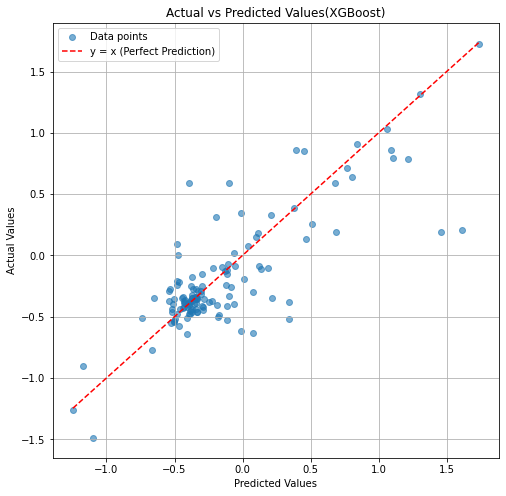

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# NumPy 배열로 변환 (필요시)
y_true = np.array(y_test)  # 실제 값
y_pred = np.array(y_pred_xgboost)  # 예측 값

# 산점도 그리기
plt.figure(figsize=(8, 8))
plt.scatter(y_pred, y_true, alpha=0.6, label='Data points')  # 예측 값 vs 실제 값
plt.plot([min(y_pred), max(y_pred)], [min(y_pred), max(y_pred)], color='red', linestyle='--', label='y = x (Perfect Prediction)')  # y = x 대각선
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs Predicted Values(XGBoost)')
plt.legend()
plt.grid()
plt.show()


### 여러 모델 비교 -> 랜덤 포레스트 높은 성능

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor


# Define a list of models to compare
models = [
    ("XGBoost", XGBRegressor(objective='reg:squarederror', random_state=42)),
    ("Random Forest", RandomForestRegressor(random_state=42)),
    ("Linear Regression", LinearRegression()),
    ("Support Vector Machine", SVR()),
    ("Decision Tree", DecisionTreeRegressor(random_state=42)),
    ("Gradient Boosting", GradientBoostingRegressor(random_state=42))
    # ("CatBoost", CatBoostRegressor(cat_features=['type'], random_state=42, verbose=False))
]

# One-hot encode the 'type' column
column_transformer = ColumnTransformer([('type', OneHotEncoder(), ['type'])], remainder='passthrough')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a DataFrame to store results
results = []

# Iterate through each model
for name, model in models:
    # Define pipeline
    pipeline = Pipeline([
        ('preprocessor', column_transformer),
        ('model', model)
    ])
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    
    # Predict and evaluate
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results.append({
        "Model": name,
        "MSE": mse,
        "R²": r2
    })

# Convert results to DataFrame and display
results_df = pd.DataFrame(results)
print(results_df)


c:\Users\DILAB\anaconda3\envs\pysofi\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\DILAB\anaconda3\envs\pysofi\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\DILAB\anaconda3\envs\pysofi\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\DILAB\anaconda3\envs\pysofi\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.

                    Model           MSE            R²
0                 XGBoost  9.292069e-02  5.689480e-01
1           Random Forest  4.973134e-02  7.693002e-01
2       Linear Regression  1.545919e+20 -7.171401e+20
3  Support Vector Machine  6.847028e-02  6.823716e-01
4           Decision Tree  9.040441e-02  5.806209e-01
5       Gradient Boosting  9.745589e-02  5.479096e-01


### 앙상블 학습

In [32]:
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# One-hot encode the 'type' column
column_transformer = ColumnTransformer(
    transformers=[
        ('type', OneHotEncoder(), ['type'])
    ],
    remainder='passthrough'  # 나머지 열은 그대로 둠
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define individual regressors
rf_model = RandomForestRegressor(random_state=42)
lr_model = LinearRegression()
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)
svr_model = SVR()

# Define the Voting Regressor with ColumnTransformer
voting_regressor = Pipeline([
    ('preprocessor', column_transformer),
    ('voting', VotingRegressor(estimators=[
        ('rf', rf_model),
        # ('xgbr', xgbr_model),
        ('svr', svr_model)
    ]))
])


# Fit the model
voting_regressor.fit(X_train, y_train)

# Predict and evaluate
y_pred = voting_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}, R²: {r2:.4f}")


c:\Users\DILAB\anaconda3\envs\pysofi\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


MSE: 0.0493, R²: 0.7711


In [33]:
from sklearn.ensemble import StackingRegressor

stacking_regressor = Pipeline([
    ('preprocessor', column_transformer),
    ('voting', StackingRegressor(
        estimators=[
            ('rf', rf_model),
            # ('xgbr', xgbr_model),
            ('svr', svr_model)
        ],
        final_estimator=LinearRegression()  # 메타 모델

    ))
])


# Fit the model
stacking_regressor.fit(X_train, y_train)

# Predict and evaluate
y_pred_ensemble = stacking_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}, R²: {r2:.4f}")

c:\Users\DILAB\anaconda3\envs\pysofi\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


MSE: 0.0493, R²: 0.7711


In [150]:
len(y_test)

128

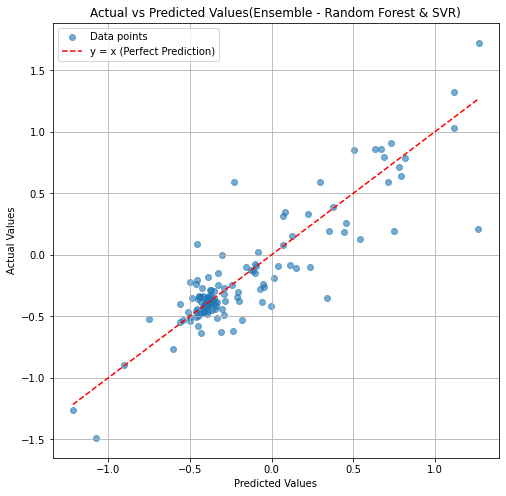

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# NumPy 배열로 변환 (필요시)
y_true = np.array(y_test)  # 실제 값
y_pred = np.array(y_pred_ensemble)  # 예측 값

# 산점도 그리기
plt.figure(figsize=(8, 8))
plt.scatter(y_pred, y_true, alpha=0.6, label='Data points')  # 예측 값 vs 실제 값
plt.plot([min(y_pred), max(y_pred)], [min(y_pred), max(y_pred)], color='red', linestyle='--', label='y = x (Perfect Prediction)')  # y = x 대각선
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs Predicted Values(Ensemble - Random Forest & SVR)')
plt.legend()
plt.grid()
plt.show()


### 하이퍼 파라미터 튜닝

In [57]:
null_columns = combined_df.columns[combined_df.isnull().any()]
print("Columns with null values:", null_columns)

Columns with null values: Index(['IUPAC Name'], dtype='object')


In [58]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,type
584,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neutral
124,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neutral
233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neutral
201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neutral
199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neutral
52,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neutral
222,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neutral
395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neutral


In [59]:
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score

# ColumnTransformer 설정
column_transformer = ColumnTransformer(
    transformers=[
        ('type', OneHotEncoder(), ['type'])  # 'type' 열을 원-핫 인코딩
    ],
    remainder='passthrough'  # 나머지 열은 그대로 둠
)

def objective(trial):
    # 하이퍼파라미터 탐색 공간
    n_estimators = trial.suggest_int('n_estimators', 50, 500)
    max_depth = trial.suggest_int('max_depth', 5, 50)
    max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2'])
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)
    
    # Pipeline 설정
    pipeline = Pipeline([
        ('preprocessor', column_transformer),
        ('model', RandomForestRegressor(
            n_estimators=n_estimators,
            max_depth=max_depth,
            max_features=max_features,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            random_state=42
        ))
    ])
    
    # 교차 검증 점수 계산
    score = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2').mean()
    return score

# Optuna 스터디 실행
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

# 최적 하이퍼파라미터
best_params = study.best_params
print("Best Parameters:", best_params)


[I 2024-11-23 12:50:58,805] A new study created in memory with name: no-name-aef2a05f-01cc-4294-b879-d05da46fb797
c:\Users\DILAB\anaconda3\envs\pysofi\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\DILAB\anaconda3\envs\pysofi\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\DILAB\anaconda3\envs\pysofi\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\DILAB\anaconda3\envs\pysofi\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names onl

Best Parameters: {'n_estimators': 418, 'max_depth': 36, 'max_features': 'auto', 'min_samples_split': 3, 'min_samples_leaf': 1}


In [69]:

# 최적 파라미터 적용
best_params = {'n_estimators': 418, 'max_depth': 36, 'max_features': 'auto', 'min_samples_split': 3, 'min_samples_leaf': 1}

# 최적 모델 학습
pipeline = Pipeline([
    ('preprocessor', column_transformer),
    ('model', RandomForestRegressor(**best_params, random_state=42))  # 최적 파라미터 적용
])


# 학습
pipeline.fit(X_train, y_train)

# 예측
y_pred = pipeline.predict(X_test)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")


c:\Users\DILAB\anaconda3\envs\pysofi\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Mean Squared Error (MSE): 0.0505
R² Score: 0.7655


In [134]:
from sklearn.ensemble import StackingRegressor

stacking_regressor = Pipeline([
    ('preprocessor', column_transformer),
    ('voting', StackingRegressor(
        estimators=[
            ('rf', RandomForestRegressor(**best_params, random_state=42)),
            # ('xgbr', xgbr_model),
            ('svr', svr_model)
        ],
        final_estimator=LinearRegression()  # 메타 모델

    ))
])


# Fit the model
stacking_regressor.fit(X_train, y_train)

# Predict and evaluate
y_pred = stacking_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}, R²: {r2:.4f}")

c:\Users\DILAB\anaconda3\envs\pysofi\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


MSE: 0.0482, R²: 0.7762


In [63]:
X

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,type
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,radical
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,radical
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,radical
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,radical
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,radical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neutral
54,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neutral
55,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neutral
57,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neutral


### 피쳐 중요도에 따라 가중치 반영

In [71]:
# RandomForest 모델 접근
model = pipeline.named_steps['model']  # Pipeline에서 RandomForest 모델 접근
feature_importances = model.feature_importances_  # 특성 중요도 추출

# ColumnTransformer로 인코딩된 피처 이름 가져오기
one_hot_features = pipeline.named_steps['preprocessor'].named_transformers_['type'].get_feature_names_out(['type'])
all_feature_names = list(one_hot_features) + list(X.columns[:-1])  # 인코딩된 피처 + 나머지 피처 이름

# 중요도 높은 순서대로 정렬
sorted_indices = np.argsort(feature_importances)[::-1]

# 상위 10개 특성 출력
print("Top 10 Important Features:")
for idx in sorted_indices[:10]:
    print(f"Feature: {all_feature_names[idx]}, Importance: {feature_importances[idx]:.4f}")



Top 10 Important Features:
Feature: 463, Importance: 0.1013
Feature: type_anion, Importance: 0.0926
Feature: 715, Importance: 0.0688
Feature: 561, Importance: 0.0625
Feature: 1020, Importance: 0.0429
Feature: 397, Importance: 0.0366
Feature: 306, Importance: 0.0283
Feature: 229, Importance: 0.0266
Feature: 935, Importance: 0.0260
Feature: 168, Importance: 0.0208


In [75]:
len(all_feature_names)

2051

In [89]:
print(type(all_feature_names[3]))

<class 'int'>


In [84]:
# 중요도 상위 10개 특성 추출
top_n = 10
top_indices = sorted_indices[:top_n]
top_weights = feature_importances[top_indices]

# 파이프라인 전처리를 통해 인코딩된 데이터 가져오기
X_train_transformed = pipeline.named_steps['preprocessor'].transform(X_train)
X_test_transformed = pipeline.named_steps['preprocessor'].transform(X_test)

# 데이터에 가중치 적용
X_train_weighted = X_train_transformed.copy()
X_test_weighted = X_test_transformed.copy()

for idx, weight in zip(top_indices, top_weights):
    X_train_weighted[:, idx] *= (1 + weight)  # 중요도 기반 가중치 추가
    X_test_weighted[:, idx] *= (1 + weight)

# 가중치 적용된 데이터로 모델 재학습
rf_weighted_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_weighted_model.fit(X_train_weighted, y_train)

# 예측 및 평가
y_pred = rf_weighted_model.predict(X_test_weighted)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Weighted Features - Mean Squared Error (MSE): {mse:.4f}")
print(f"Weighted Features - R² Score: {r2:.4f}")

Weighted Features - Mean Squared Error (MSE): 0.0497
Weighted Features - R² Score: 0.7693


In [94]:
top_weights

array([0.10128893, 0.09262353, 0.06883251, 0.06246088, 0.04289605,
       0.03655401, 0.02825367, 0.02657699, 0.02601811, 0.02082904])

In [95]:
# 중요도가 높은 특성의 값 분포 확인
print("Feature Value Distribution for Top Features:")
for idx in top_indices:
    print(f"Feature {idx}: {X_train_transformed[:, idx].sum()} (Sum of Values)")


Feature Value Distribution for Top Features:
Feature 466: 129.0 (Sum of Values)
Feature 0: 16.0 (Sum of Values)
Feature 718: 170.0 (Sum of Values)
Feature 564: 42.0 (Sum of Values)
Feature 1023: 39.0 (Sum of Values)
Feature 400: 31.0 (Sum of Values)
Feature 309: 4.0 (Sum of Values)
Feature 232: 12.0 (Sum of Values)
Feature 938: 165.0 (Sum of Values)
Feature 171: 1.0 (Sum of Values)


In [99]:
# 가중치 적용 전후 확인
print("Before weighting, top feature values:")
print(X_train_transformed[:5, top_indices[3]])  # 가중치 적용 전

# 가중치 적용
for idx, weight in zip(top_indices, top_weights):
    X_train_weighted[:, idx] *= (1 + weight)  # 중요도 기반 가중치 추가
    X_test_weighted[:, idx] *= (1 + weight)

print("\nAfter weighting, top feature values:")
print(X_train_weighted[:5, top_indices[3]])  # 가중치 적용 후


Before weighting, top feature values:
[0. 0. 0. 0. 0.]

After weighting, top feature values:
[0. 0. 0. 0. 0.]


### 피쳐 내 유효값 비율에 따라 제거

In [141]:
# 각 특성의 유효한 값(0이 아닌 값)의 비율 확인
non_zero_ratio = (X_train != 0).sum(axis=0) / X_train.shape[0]

# 유효 값 비율이 일정 기준 이하(예: 3%)인 특성 제거
threshold = 0.03  # 3% 기준
selected_features = non_zero_ratio > threshold

# 유효 특성만 선택 (DataFrame 형식 유지)
X_train_reduced_df = X_train.loc[:, selected_features]
X_test_reduced_df = X_test.loc[:, selected_features]

# 확인
print("Reduced Training DataFrame:")
print(X_train_reduced_df.head())


Reduced Training DataFrame:
     1  4  11  14  15  25  33  36  38  39  ...  980  984  1003  1011  1014  \
584  1  0   0   0   0   0   1   0   0   0  ...    0    1     0     0     0   
124  0  0   0   0   0   0   1   0   0   0  ...    0    0     0     1     0   
233  0  0   0   0   0   0   1   0   0   0  ...    0    0     0     0     0   
201  0  0   0   0   0   0   1   0   0   0  ...    0    0     0     0     0   
199  0  0   0   0   1   0   1   0   0   0  ...    0    0     0     0     0   

     1017  1018  1019  1020     type  
584     1     0     0     0  neutral  
124     0     1     0     0  neutral  
233     0     0     0     0  neutral  
201     0     0     0     0  neutral  
199     0     0     0     0  neutral  

[5 rows x 185 columns]


In [127]:
X_train_reduced_df

,1,4,11,14,15,25,33,36,38,39,...,980,984,1003,1011,1014,1017,1018,1019,1020,type
584,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,neutral
124,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,neutral
233,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,neutral
201,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,neutral
199,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,1,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,neutral
52,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,neutral
222,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,neutral
395,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,neutral


In [142]:
# 학습
pipeline.fit(X_train_reduced_df, y_train)

# 예측
y_pred = pipeline.predict(X_test_reduced_df)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

c:\Users\DILAB\anaconda3\envs\pysofi\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Mean Squared Error (MSE): 0.0484
R² Score: 0.7756


In [85]:
# 가중치 적용 전후의 데이터 확인
print("Original Feature Value:", X_train_transformed[0, top_indices[0]])  # 가중치 적용 전
print("Weighted Feature Value:", X_train_weighted[0, top_indices[0]])   # 가중치 적용 후


Original Feature Value: 0.0
Weighted Feature Value: 0.0


In [44]:
y

0     0.6900
1     0.7500
2     0.9100
3     0.9700
4     1.0400
       ...  
53    0.2100
54    0.8600
55    0.1400
57    0.5900
58    0.8665
Name: SRP, Length: 639, dtype: float64

In [135]:
from transformers import AutoTokenizer, AutoModel
import torch

# MolBERT 모델과 토크나이저 로드
model_name = "DeepChem/molbert"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# SMILES 문자열 임베딩 함수 정의
def smiles_to_embedding(smiles_list):
    """SMILES 문자열을 MolBERT 벡터로 변환."""
    embeddings = []
    for smiles in smiles_list:
        # SMILES 토큰화
        inputs = tokenizer(smiles, return_tensors="pt", truncation=True, max_length=128, padding="max_length")
        
        # MolBERT 임베딩 생성
        with torch.no_grad():
            outputs = model(**inputs)
        
        # [CLS] 토큰의 임베딩 사용
        embeddings.append(outputs.last_hidden_state[:, 0, :].squeeze().numpy())
    
    return embeddings


OSError: DeepChem/molbert is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo either by logging in with `huggingface-cli login` or by passing `token=<your_token>`

In [121]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,type
584,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neutral
124,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neutral
233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neutral
201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neutral
199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neutral
52,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neutral
222,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neutral
395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neutral


In [46]:

from catboost import CatBoostRegressor

# CatBoost model
catboost_model = CatBoostRegressor(verbose=0, random_state=42)

# Fit the model
catboost_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = catboost_model.predict(X_test)

# Calculate MSE and R2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")


CatBoostError: catboost/libs/data/features_layout.cpp:124: All feature names should be different, but '0' used more than once.

In [47]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_test)

# Calculate MSE and R2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")


c:\Users\DILAB\anaconda3\envs\pysofi\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


ValueError: could not convert string to float: 'neutral'

In [64]:
#Morgan Fingerprints
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# 예측 및 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)
print("MAPE:", mape, "%")


MSE: 0.09292069287677385
RMSE: 0.3048289567557089
MAE: 0.18940970057249068
R²: 0.5689480376003918
MAPE: inf %


In [68]:
!pip install pubchempy

  Created wheel for pubchempy: filename=PubChemPy-1.0.4-py3-none-any.whl size=13835 sha256=ab05e5b04e9d7e9aebeb657aa9e5efa44eeda2fbcbb8a8bec3cdeae5c2025538
  Stored in directory: c:\users\dilab\appdata\local\pip\cache\wheels\84\45\0e\b597debba098119b642eaf728ae1883d23ad8ea2a9366f2ded
Successfully built pubchempy


In [71]:
import pubchempy as pcp

unique_solvents = combined_df['solvent'].replace('-', pd.NA).dropna().unique()

# PubChemPy를 사용하여 solvent 이름을 SMILES로 변환
def name_to_smiles(name):
    """PubChem을 사용해 분자 이름을 SMILES로 변환."""
    try:
        compound = pcp.get_compounds(name, 'name')
        if compound:
            return compound[0].canonical_smiles  # 첫 번째 결과의 SMILES 반환
        else:
            return None  # 결과가 없을 경우 None 반환
    except Exception as e:
        print(f"Error converting {name}: {e}")
        return None

# 고유 solvent 값만 변환
solvent_to_smiles_map = {solvent: name_to_smiles(solvent) for solvent in unique_solvents}

# solvent 열을 SMILES로 매핑하여 새로운 열 추가
combined_df['solvent_smiles'] = combined_df['solvent'].map(solvent_to_smiles_map)

In [72]:
combined_df

,IUPAC Name,SMILE,solvent,type,SRP,solvent_smiles
0,NaN,C1=CC(=CC=C1[CH2])OC2=CC=CC=C2,CH3CN,radical,0.6900,CC#N
1,NaN,C2(=CC=C(C=C2)C)[CH2],CH3CN,radical,0.7500,CC#N
2,NaN,C1=C(C=CC=C1[CH2])C,CH3CN,radical,0.9100,CC#N
3,NaN,C1=CC(=CC=C1[CH2])Cl,CH3CN,radical,0.9700,CC#N
4,NaN,C1(=CC=C(C=C1)[CH2])COC,CH3CN,radical,1.0400,CC#N
...,...,...,...,...,...,...
53,"1,10-phenanthroline;ruthenium(2+)",C1=CC2=C(C3=C(C=CC=N3)C=C2)N=C1.C1=CC2=C(C3=C(...,H2O,neutral,0.2100,O
54,ruthenium(2+);hexacyanide,[C-]#N.[C-]#N.[C-]#N.[C-]#N.[C-]#N.[C-]#N.[Ru+2],H2O,neutral,0.8600,O
55,"vanadium(2+);1,10-Phenanthroline",C1=CC2=C(C3=C(C=CC=N3)C=C2)N=C1.C1=CC2=C(C3=C(...,H2O,neutral,0.1400,O
57,dioxido(dioxo)ruthenium,[O-][Ru](=O)(=O)[O-],H2O,neutral,0.5900,O


In [74]:
!pip install torch_geometric

In [82]:
from rdkit import Chem
from rdkit.Chem import rdmolops
import torch
from torch_geometric.data import Data

def smiles_to_graph(smiles):
    if not isinstance(smiles, str):  # SMILES가 문자열인지 확인
        return None

    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None  # 유효하지 않은 SMILES 건너뜀

    atom_features = [atom.GetAtomicNum() for atom in mol.GetAtoms()]
    edges = rdmolops.GetAdjacencyMatrix(mol)
    edge_index = torch.tensor(edges.nonzero(), dtype=torch.long)
    x = torch.tensor(atom_features, dtype=torch.float).view(-1, 1)
    return Data(x=x, edge_index=edge_index)


# SMILES와 Solvent를 결합한 그래프 데이터 생성
def combine_smiles_and_solvent(smiles, solvent, srp, type_val):
    # SMILES와 solvent를 각각 그래프로 변환
    smiles_graph = smiles_to_graph(smiles)
    solvent_graph = smiles_to_graph(solvent)

    if smiles_graph is None or solvent_graph is None:
        return None  # 유효하지 않은 데이터 건너뜀

    # 그래프 특징 결합
    combined_x = torch.cat([smiles_graph.x, solvent_graph.x], dim=0)
    combined_edge_index = torch.cat(
        [smiles_graph.edge_index, solvent_graph.edge_index + smiles_graph.x.size(0)], dim=1
    )

    # type 정보를 추가
    type_mapping = {'neutral': 0, 'anion': 1, 'radical': 2}
    type_feature = torch.tensor([type_mapping[type_val]], dtype=torch.float).view(1, -1)

    # 결합된 특징에 type 추가
    combined_x = torch.cat([combined_x, type_feature.repeat(combined_x.size(0), 1)], dim=1)

    return Data(x=combined_x, edge_index=combined_edge_index, y=torch.tensor([srp], dtype=torch.float))


In [90]:
# 타겟 값에 NaN이 포함된 행 제거
combined_df = combined_df.dropna(subset=['SRP'])

# 결과 확인
combined_df


,IUPAC Name,SMILE,solvent,type,SRP,solvent_smiles
0,NaN,C1=CC(=CC=C1[CH2])OC2=CC=CC=C2,CH3CN,radical,0.6900,CC#N
1,NaN,C2(=CC=C(C=C2)C)[CH2],CH3CN,radical,0.7500,CC#N
2,NaN,C1=C(C=CC=C1[CH2])C,CH3CN,radical,0.9100,CC#N
3,NaN,C1=CC(=CC=C1[CH2])Cl,CH3CN,radical,0.9700,CC#N
4,NaN,C1(=CC=C(C=C1)[CH2])COC,CH3CN,radical,1.0400,CC#N
...,...,...,...,...,...,...
53,"1,10-phenanthroline;ruthenium(2+)",C1=CC2=C(C3=C(C=CC=N3)C=C2)N=C1.C1=CC2=C(C3=C(...,H2O,neutral,0.2100,O
54,ruthenium(2+);hexacyanide,[C-]#N.[C-]#N.[C-]#N.[C-]#N.[C-]#N.[C-]#N.[Ru+2],H2O,neutral,0.8600,O
55,"vanadium(2+);1,10-Phenanthroline",C1=CC2=C(C3=C(C=CC=N3)C=C2)N=C1.C1=CC2=C(C3=C(...,H2O,neutral,0.1400,O
57,dioxido(dioxo)ruthenium,[O-][Ru](=O)(=O)[O-],H2O,neutral,0.5900,O


In [91]:
graph_data = []

for idx, row in combined_df.iterrows():
    # NaN 또는 None 값이 있는지 확인
    if pd.isna(row['SMILE']) or pd.isna(row['solvent_smiles']):
        continue  # 잘못된 데이터는 건너뜀

    graph = combine_smiles_and_solvent(row['SMILE'], row['solvent_smiles'], row['SRP'], row['type'])
    if graph is not None:
        graph_data.append(graph)


[10:27:48] SMILES Parse Error: extra open parentheses for input: 'CC(C)N(CC[N]1C=CN=C1([N+]([O-])=O)C(C)C'
[10:27:48] SMILES Parse Error: extra open parentheses for input: 'CC(C)(C)CN(CC(O)C[N]1C=CN=C1([N+]([O-])=O)C(C)(C)C'
[10:27:48] Explicit valence for atom # 5 N, 4, is greater than permitted
[10:27:49] SMILES Parse Error: extra open parentheses for input: 'C1=NC(=C2C(=N1)N(C=N2)[C@H]3[C@@H]([C@@H]([C@H]'
[10:27:49] SMILES Parse Error: extra open parentheses for input: 'C1=NC2=C(N1[C@H]3[C@@H]([C@@H]([C@H]'
[10:27:49] Explicit valence for atom # 20 N, 4, is greater than permitted


In [92]:
graph_data

[Data(x=[17, 2], edge_index=[2, 34], y=[1]),
 Data(x=[11, 2], edge_index=[2, 20], y=[1]),
 Data(x=[11, 2], edge_index=[2, 20], y=[1]),
 Data(x=[11, 2], edge_index=[2, 20], y=[1]),
 Data(x=[13, 2], edge_index=[2, 24], y=[1]),
 Data(x=[12, 2], edge_index=[2, 22], y=[1]),
 Data(x=[12, 2], edge_index=[2, 22], y=[1]),
 Data(x=[12, 2], edge_index=[2, 22], y=[1]),
 Data(x=[12, 2], edge_index=[2, 22], y=[1]),
 Data(x=[11, 2], edge_index=[2, 20], y=[1]),
 Data(x=[11, 2], edge_index=[2, 20], y=[1]),
 Data(x=[11, 2], edge_index=[2, 20], y=[1]),
 Data(x=[11, 2], edge_index=[2, 20], y=[1]),
 Data(x=[13, 2], edge_index=[2, 24], y=[1]),
 Data(x=[12, 2], edge_index=[2, 22], y=[1]),
 Data(x=[12, 2], edge_index=[2, 22], y=[1]),
 Data(x=[14, 2], edge_index=[2, 26], y=[1]),
 Data(x=[7, 2], edge_index=[2, 10], y=[1]),
 Data(x=[17, 2], edge_index=[2, 34], y=[1]),
 Data(x=[12, 2], edge_index=[2, 22], y=[1]),
 Data(x=[13, 2], edge_index=[2, 24], y=[1]),
 Data(x=[11, 2], edge_index=[2, 20], y=[1]),
 Data(x=[15

In [93]:
from sklearn.model_selection import train_test_split
from torch_geometric.loader import DataLoader

# 학습/테스트 데이터 분리
train_data, test_data = train_test_split(graph_data, test_size=0.2, random_state=42)

# PyTorch Geometric 데이터 로더
train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
test_loader = DataLoader(test_data, batch_size=16, shuffle=False)


In [94]:
from torch.nn import Linear
from torch_geometric.nn import GCNConv, global_mean_pool
import torch.nn.functional as F

class GNNModel(torch.nn.Module):
    def __init__(self):
        super(GNNModel, self).__init__()
        self.conv1 = GCNConv(2, 32)  # 입력 특징: 2 (원자번호 + type), 출력: 32
        self.conv2 = GCNConv(32, 64)
        self.fc1 = Linear(64, 32)
        self.fc2 = Linear(32, 1)

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch

        # GCN 레이어 적용
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)

        # 그래프 풀링
        x = global_mean_pool(x, batch)

        # Fully Connected 레이어
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return x



In [99]:
from torch_geometric.nn import GATConv

class GATModel(torch.nn.Module):
    def __init__(self):
        super(GNNModel, self).__init__()
        self.conv1 = GATConv(2, 32, heads=4)  # GATConv로 변경
        self.conv2 = GATConv(32 * 4, 64, heads=1)
        self.fc1 = Linear(64, 32)
        self.fc2 = Linear(32, 1)

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = global_mean_pool(x, batch)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return x


In [95]:
import torch

def validate_tensor(tensor, name="Tensor"):
    if torch.isnan(tensor).any():
        print(f"{name} contains NaN values.")
    if torch.isinf(tensor).any():
        print(f"{name} contains Inf values.")
    return tensor

for batch in train_loader:
    validate_tensor(batch.x, "Input Features")
    validate_tensor(batch.y, "Target Labels")


In [102]:
import torch.optim as optim

# 모델, 옵티마이저, 손실 함수 초기화
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GNNModel().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = torch.nn.MSELoss()

# 학습 루프
for epoch in range(100):
    model.train()
    total_loss = 0
    for batch in train_loader:
        batch = batch.to(device)
        optimizer.zero_grad()
        out = model(batch)
        loss = criterion(out.view(-1), batch.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f'Epoch {epoch+1}, Loss: {total_loss:.4f}')


Epoch 1, Loss: 11.3693
Epoch 2, Loss: 11.1341
Epoch 3, Loss: 11.1328
Epoch 4, Loss: 11.1503
Epoch 5, Loss: 11.2118
Epoch 6, Loss: 11.2058
Epoch 7, Loss: 10.9751
Epoch 8, Loss: 11.0468
Epoch 9, Loss: 10.9997
Epoch 10, Loss: 10.8950
Epoch 11, Loss: 10.6987
Epoch 12, Loss: 10.7473
Epoch 13, Loss: 10.7382
Epoch 14, Loss: 10.4631
Epoch 15, Loss: 10.5346
Epoch 16, Loss: 10.5345
Epoch 17, Loss: 10.6012
Epoch 18, Loss: 10.4931
Epoch 19, Loss: 10.3969
Epoch 20, Loss: 10.1941
Epoch 21, Loss: 9.8912
Epoch 22, Loss: 9.8177
Epoch 23, Loss: 9.9124
Epoch 24, Loss: 9.9046
Epoch 25, Loss: 9.7559
Epoch 26, Loss: 9.8463
Epoch 27, Loss: 9.6909
Epoch 28, Loss: 9.5483
Epoch 29, Loss: 9.6715
Epoch 30, Loss: 9.8726
Epoch 31, Loss: 10.0037
Epoch 32, Loss: 9.6569
Epoch 33, Loss: 9.6461
Epoch 34, Loss: 9.9799
Epoch 35, Loss: 9.7750
Epoch 36, Loss: 9.5652
Epoch 37, Loss: 9.5679
Epoch 38, Loss: 9.9088
Epoch 39, Loss: 9.7492
Epoch 40, Loss: 9.5182
Epoch 41, Loss: 9.7940
Epoch 42, Loss: 9.5772
Epoch 43, Loss: 9.5159

In [103]:
model.eval()
with torch.no_grad():
    total_loss = 0
    for batch in test_loader:
        batch = batch.to(device)
        out = model(batch)
        loss = criterion(out.view(-1), batch.y)
        total_loss += loss.item()
    print(f'Test Loss: {total_loss:.4f}')


Test Loss: 1.7149


In [104]:

# 테스트 데이터에서 예측 수행
model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for batch in test_loader:
        batch = batch.to(device)
        preds = model(batch).view(-1).cpu().numpy()  # 예측값
        targets = batch.y.view(-1).cpu().numpy()    # 실제값
        
        y_pred.extend(preds)
        y_true.extend(targets)

# R² 계산
r2 = r2_score(y_true, y_pred)
print(f"R² Score: {r2:.4f}")


R² Score: 0.1346


In [ ]:


df.dropna(axis=0, inplace=True)

mol_dict = defaultdict(list)
for smile in df["SMILES"].values:
    if smile == "nan":
        continue
    bi = {}
    fpgen = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, bitInfo=bi)
    # bi.update({37: ((0, 0),)})
    # lst.append(Draw.DrawMorganBit(mol, 37, bi, useSVG=True))
    # 753 715 1195 838 1457 1476 888 694 650 455 780 1448/ 790 1457 1384 838 753 1171 358 650 1073 1963 1 1602 1933 935 
    for n in [753, 715, 1195, 838, 1457, 1476, 888, 694, 650, 455, 780, 1448, 790, 1384]:
        if n in list(fpgen.GetOnBits()):
            mol_dict[n].append(Draw.DrawMorganBit(mol, n, bi, useSVG=True))

753


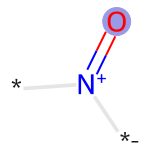

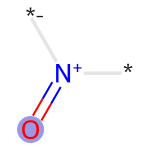

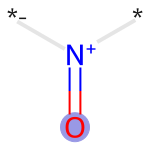

715


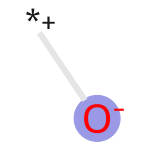

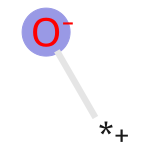

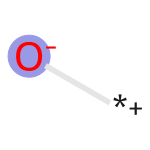

1195


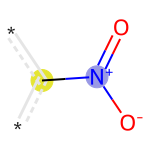

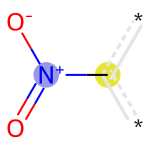

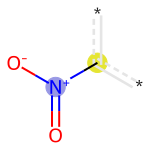

838


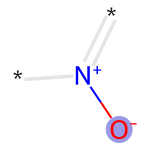

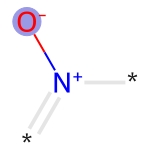

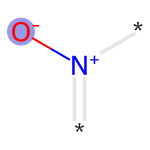

650


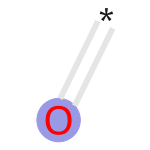

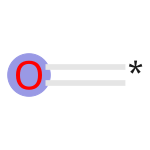

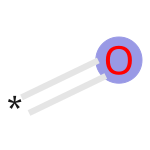

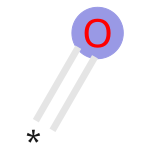

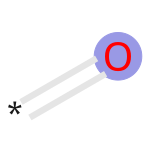

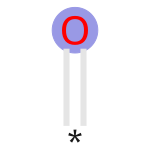

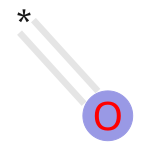

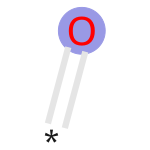

694


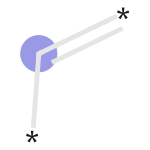

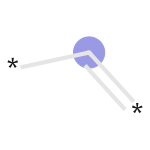

780


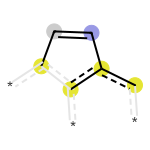

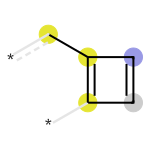

1448


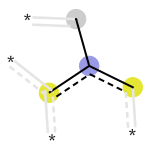

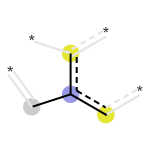

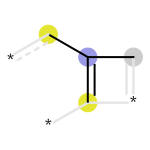

790


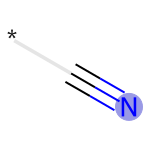

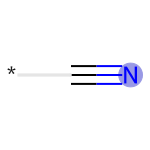

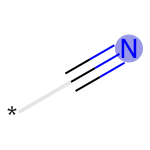

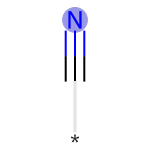

1384


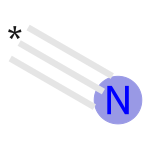

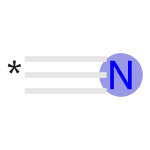

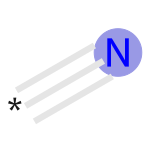

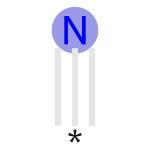

455


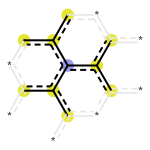

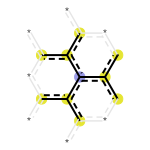

In [5]:
for k, draws in mol_dict.items():
    print(k)
    for draw in draws:
        display(draw)

In [6]:
# https://rdkit.blogspot.com/2016/03/explaining-morgan-similarity.html